<a href="https://colab.research.google.com/github/FranciscoAssislsj/Previsao_notas/blob/main/Ex_RegressaoLinear_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aprovacao_alunos2.xlsx to aprovacao_alunos2.xlsx


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
alunos = pd.read_excel("aprovacao_alunos2.xlsx")

In [ ]:
alunos.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [ ]:
alunos.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [ ]:
alunos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 564.0 bytes


<Axes: xlabel='ano_2015', ylabel='Count'>

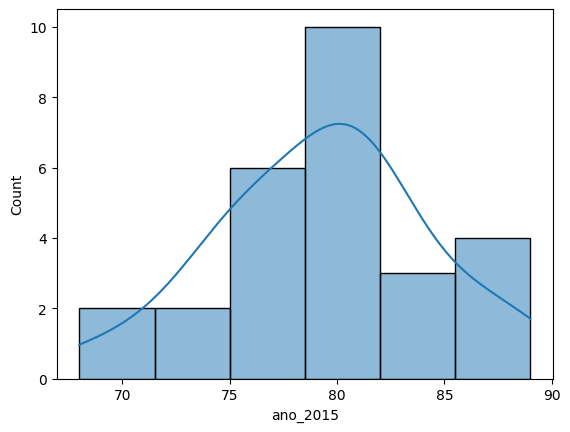

In [ ]:
sns.histplot(data = alunos, x = "ano_2015", kde = True)

<Axes: xlabel='ano_2016', ylabel='Count'>

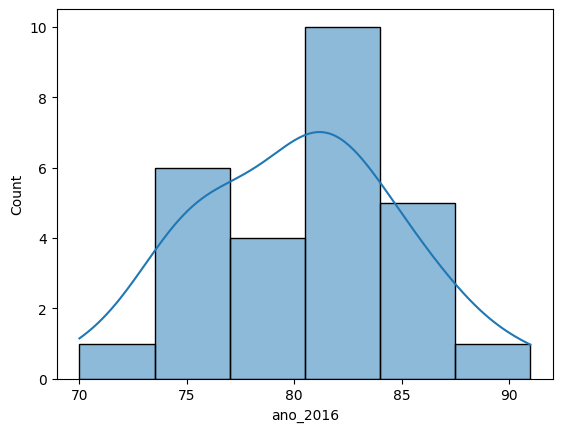

In [ ]:
sns.histplot(data = alunos, x = "ano_2016", kde = True)

<Axes: xlabel='ano_2015', ylabel='ano_2016'>

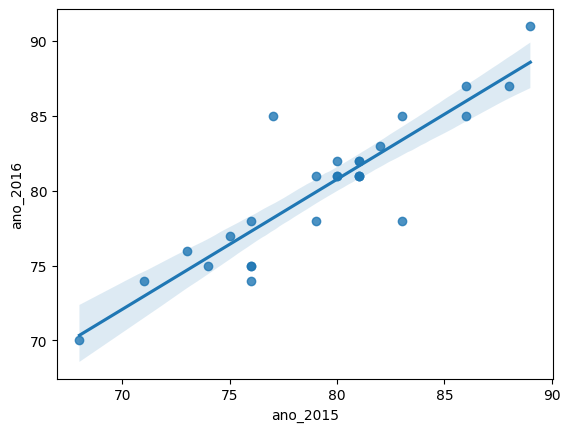

In [ ]:
sns.regplot(data=alunos, x = "ano_2015", y = "ano_2016")

In [ ]:
alunos.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
function = "ano_2016 ~ ano_2015"
model = smf.ols(formula = function, data = alunos).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           3.02e-10
Time:                        13:46:19   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.3143      6.880      1.645      0.1

In [ ]:
function = "ano_2016 ~ ano_2015 - 1"
model = smf.ols(formula = function, data = alunos).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               ano_2016   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          3.397e+04
Date:                Mon, 31 Mar 2025   Prob (F-statistic):                    4.76e-42
Time:                        13:46:40   Log-Likelihood:                         -59.863
No. Observations:                  27   AIC:                                      121.7
Df Residuals:                      26   BIC:                                      123.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

alunos_norm = pd.DataFrame(scaler.fit_transform(alunos), index = alunos.index, columns = alunos.columns)

In [ ]:
alunos_norm.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


<Axes: xlabel='ano_2015', ylabel='ano_2016'>

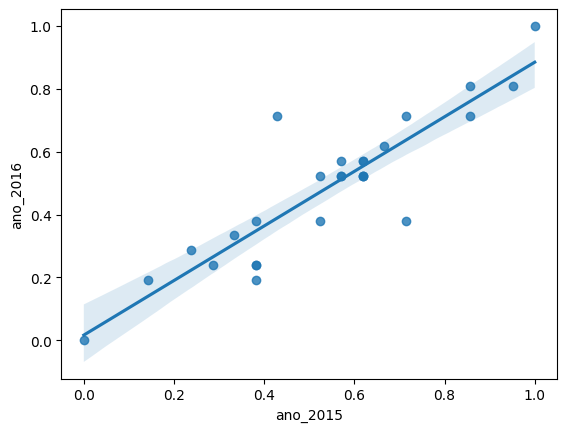

In [ ]:
sns.regplot(data = alunos_norm, x = "ano_2015", y ="ano_2016")

In [ ]:
x = alunos_norm[['ano_2015']]

y = alunos_norm[['ano_2016']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.20, random_state = 42)

model = LinearRegression()

model.fit(x_treino, y_treino)

LinearRegression()

In [ ]:
r_squared = model.score(x_treino, y_treino)
print("r_squared:",r_squared)

r_squared: 0.8800910056640281


In [ ]:
y_pred_treino = model.predict(x_treino)

In [ ]:
from sklearn import metrics

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_treino, y_pred_treino))
print("MSE: ", metrics.mean_squared_error(y_treino, y_pred_treino))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE:  0.06313092719197842
MSE:  0.006947385853516443
RMSE:  0.08335097991935334


In [ ]:
model.fit(x_teste, y_teste)

LinearRegression()

In [ ]:
r_squared_teste = model.score(x_teste, y_teste)
print(r_squared_teste)

0.3252467793207293


In [ ]:
y_pred_teste = model.predict(x_teste)

In [ ]:
print("MAE: ", metrics.mean_absolute_error(y_teste, y_pred_teste))
print("MSE: ", metrics.mean_squared_error(y_teste, y_pred_teste))
print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MAE:  0.08998515473335626
MSE:  0.014620503143970094
RMSE:  0.12091527258361573
